# Proyek Analisis Data :

- **Nama:** Riska Septyani
- **Email:** riskaseptyani30@gmail.com
- **ID Dicoding:** riskasptyani

# Pertanyaan Bisnis

### 1. Saat Season apa jumlah peminjam sepeda paling banyak?
### 2. Tahun berapa jumlah peminjam sepeda paling sedikit?

# Packages or Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA WRANGLING

# Gathering Data

### Memuat Tabel Day

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/riskasptyani/bangkit-dicoding/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Membuat Tabel Hour

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/riskasptyani/bangkit-dicoding/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Assessing Data

### Menilai Data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


kolom **dteday** seharunysa direpresentasikan sebagai tipe data **datetime** bukan object.

saya juga akan mengubah nama kolom **dteday** menjadi **date**, **yr** menjadi **year**, **mnth** menjadi **month**, **weathersit** menjadi **weather**.

##### Untuk Mencari Duplikasi Data

In [5]:
print("Jumlah data duplikasi pada day_df: ", day_df.duplicated().sum())

Jumlah data duplikasi pada day_df:  0


Menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame day_df :

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai Data hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kolom **dteday** seharunysa direpresentasikan sebagai tipe data **datetime** bukan object.

saya juga akan mengubah nama kolom **dteday** menjadi **date**, **hr** menjadi **hour**, **yr** menjadi **year**, **mnth** menjadi **month**, **weathersit** menjadi **weather**.

##### Untuk Mencari Duplikasi Data

In [8]:
print("Jumlah data duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah data duplikasi pada hour_df:  0


Menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame hour_df:

In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Cleaning Data

### Mengganti tipe data kolom **dteday** ke datetime pada tabel day_df dan mengubah nama kolom **dteday** menjadi **date**, **yr** menjadi **year**, **mnth** menjadi **month**, **weathersit** menjadi **weather**.

In [10]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather"
}, inplace=True)

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Mengganti tipe data kolom **dteday** ke datetime pada tabel hour_df dan mengubah nama kolom **dteday** menjadi **date**, **hr** menjadi **hour**, **yr** menjadi **year**, **mnth** menjadi **month**, **weathersit** menjadi **weather**.

In [14]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
hour_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "hr" : "hour",
    "weathersit" : "weather"
}, inplace=True)

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### mengubah isi data **season** dan **weather** pada day_df dan hour_df.


data **season**

In [17]:
season_map={1: "spring", 2:"summer", 3:"fall", 4:"winter"}

day_df["season"] = day_df["season"].map(season_map)
hour_df["season"] = hour_df["season"].map(season_map)

In [18]:
day_df.head(10)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,spring,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,spring,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,spring,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,spring,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,spring,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


data **weather**

In [19]:
weather_map={1: "clear", 2:"mist", 3:"light snow", 4:"heavy rain"}

day_df["weather"] = day_df["weather"].map(weather_map)
hour_df["weather"] = hour_df["weather"].map(weather_map)

In [20]:
day_df.head(10)

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,spring,0,1,0,4,1,clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,spring,0,1,0,5,1,mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,spring,0,1,0,6,0,mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,spring,0,1,0,0,0,clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,spring,0,1,0,1,1,clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


# Exploratory Data Analysis (EDA)

### Eksplorasi data day_df

In [21]:
day_df.describe(include="all")

<ipython-input-21-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,NaN,NaN,NaN,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [22]:
day_df.groupby(by="season").agg({
    "cnt" : ["mean", "min", "max"]
})

cnt            
               mean   min   max
season                         
fall    5644.303191  1115  8714
spring  2604.132597   431  7836
summer  4992.331522   795  8362
winter  4728.162921    22  8555

In [23]:
day_df.groupby(by="year").agg({
    "cnt" : ["mean", "min", "max"]
})

cnt           
             mean  min   max
year                        
0     3405.761644  431  6043
1     5599.934426   22  8714

### Eksplorasi data hour_df

In [24]:
hour_df.describe(include="all")

<ipython-input-24-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,NaN,NaN,NaN,NaN,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [25]:
hour_df.groupby(by="season").agg({
    "cnt" : ["mean", "min", "max"]
})

cnt         
              mean min  max
season                     
fall    236.016237   1  977
spring  111.114569   1  801
summer  208.344069   1  957
winter  198.868856   1  967

In [26]:
hour_df.groupby(by="hour").agg({
    "cnt" : ["mean", "min", "max"]
})

cnt         
            mean min  max
hour                     
0      53.898072   2  283
1      33.375691   1  168
2      22.869930   1  132
3      11.727403   1   79
4       6.352941   1   28
5      19.889819   1   66
6      76.044138   1  213
7     212.064649   1  596
8     359.011004   5  839
9     219.309491  14  426
10    173.668501   8  539
11    208.143054  10  663
12    253.315934   3  776
13    253.661180  11  760
14    240.949246  12  750
15    251.233196   7  750
16    311.983562  11  783
17    461.452055  15  976
18    425.510989  23  977
19    311.523352  11  743
20    226.030220  11  567
21    172.314560   6  584
22    131.335165   9  502
23     87.831044   2  256

## Explanatory Data Anlysis dan Data Visualization

### 1. Saat Season apa jumlah peminjam sepeda paling banyak?


<ipython-input-27-3c6a7857d6c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=day_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
<ipython-input-27-3c6a7857d6c2>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="season", y="cnt", data=day_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
<ipython-input-27-3c6a7857d6c2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=hour_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[1])
<ipython-input-27-3c6a7857d6c2>:11: UserWarning: The palette list has more values (5) than nee

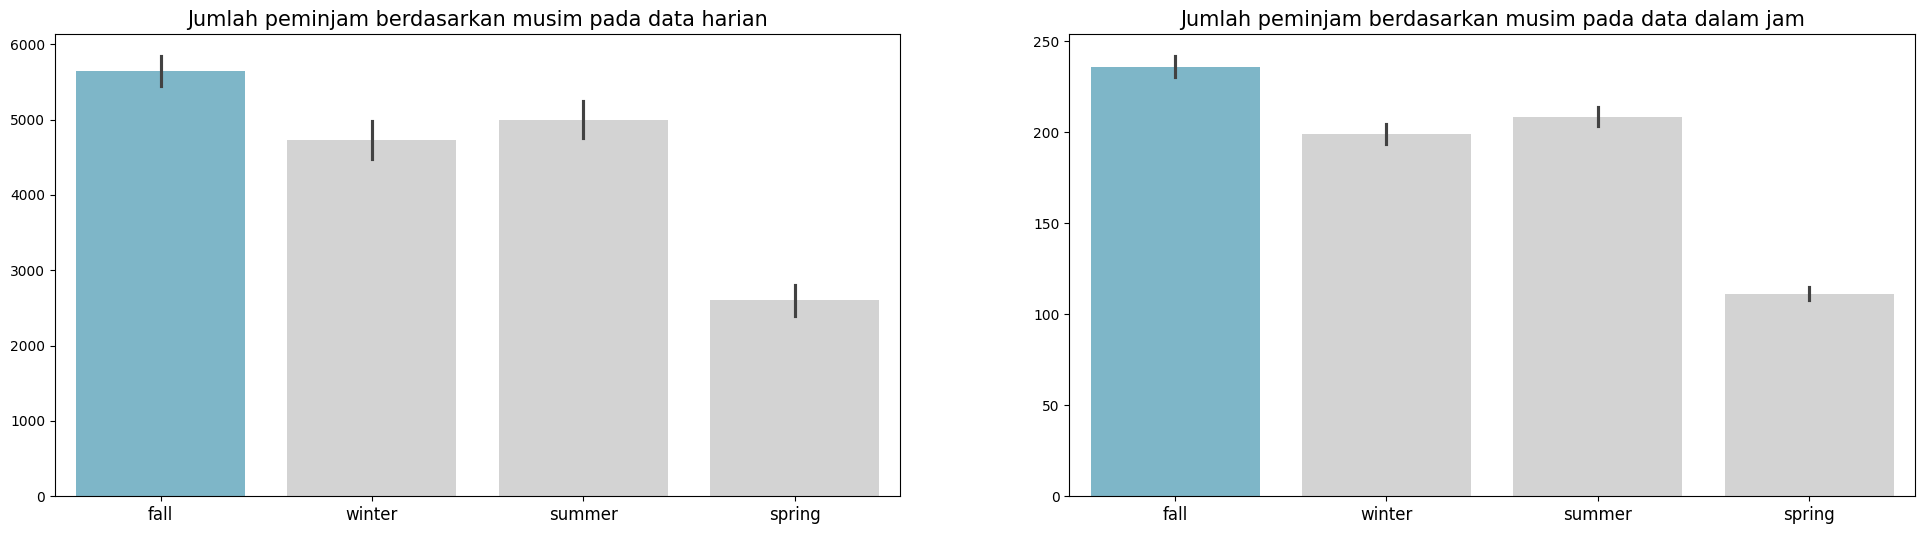

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="season", y="cnt", data=day_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Jumlah peminjam berdasarkan musim pada data harian", loc="center", fontsize=15)
ax[0].tick_params(axis="x", labelsize=12)

sns.barplot(x="season", y="cnt", data=hour_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Jumlah peminjam berdasarkan musim pada data dalam jam", loc="center", fontsize=15)
ax[1].tick_params(axis="x", labelsize=12)

**Answer**

Bisa dilihat berdasarkan grafik bar diatas bahwa banyak orang akan menyewa sepeda pada musim gugur, lalu diikuti dengan musim panas, musim salju, lalu yang terakhir musim semi.

### 2. Tahun berapa jumlah peminjam sepeda paling sedikit?

In [28]:
sum_day_df = day_df.groupby("year").cnt.sum().sort_values(ascending=False).reset_index()
sum_day_df.head(15)

,year,cnt
0,1,2049576
1,0,1243103


In [29]:
sum_hour_df = hour_df.groupby("year").cnt.sum().sort_values(ascending=False).reset_index()
sum_hour_df.head(15)

,year,cnt
0,1,2049576
1,0,1243103


<ipython-input-30-408f8c8e7a63>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="year", y="cnt", data=day_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
<ipython-input-30-408f8c8e7a63>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="year", y="cnt", data=day_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
<ipython-input-30-408f8c8e7a63>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="year", y="cnt", data=hour_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[1])
<ipython-input-30-408f8c8e7a63>:11: UserWarning: The palette list has more values (5) than needed (2

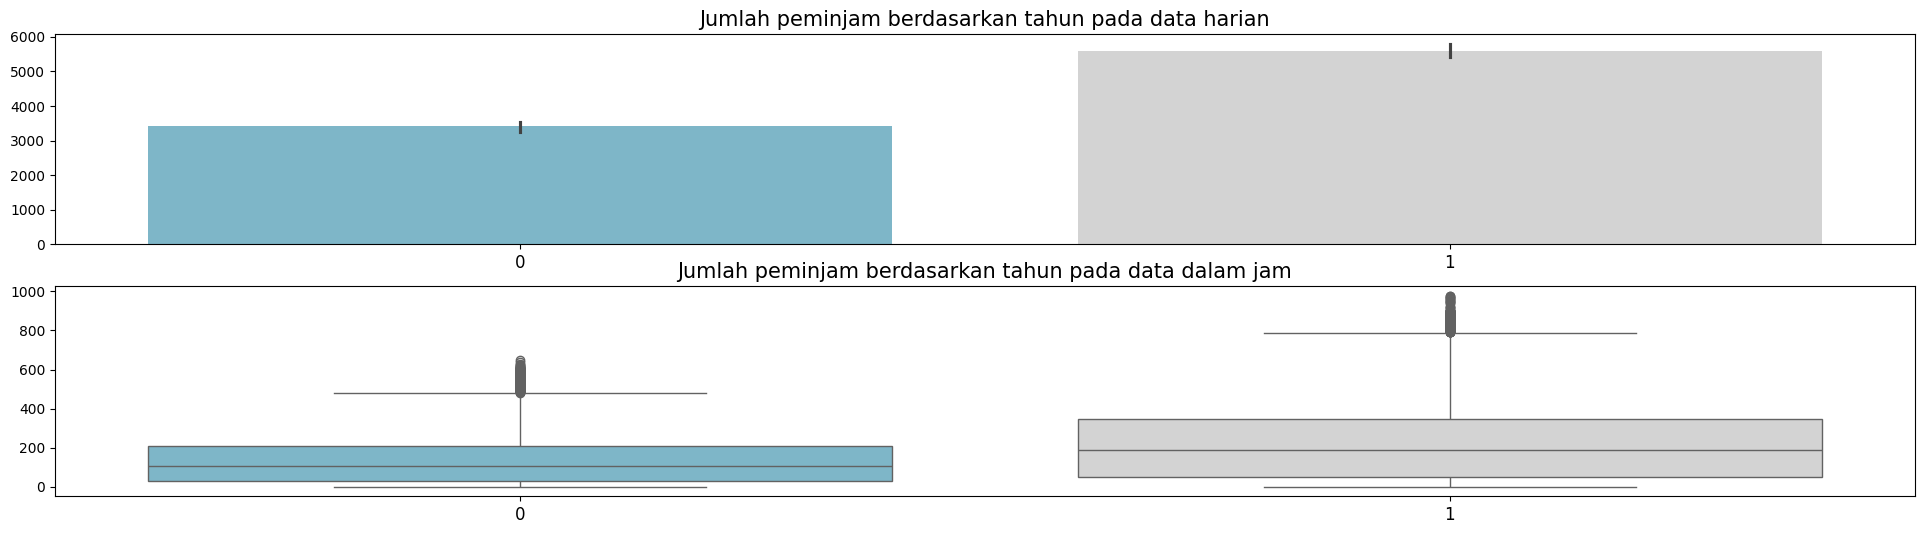

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="year", y="cnt", data=day_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].set_title("Jumlah peminjam berdasarkan tahun pada data harian", loc="center", fontsize=15)
ax[0].tick_params(axis="x", labelsize=12)

sns.boxplot(x="year", y="cnt", data=hour_df.sort_values(by="cnt", ascending=False), palette=colors, ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_title("Jumlah peminjam berdasarkan tahun pada data dalam jam", loc="center", fontsize=15)
ax[1].tick_params(axis="x", labelsize=12)

**Answer**

Dapat dilihat untuk peminjam paling sedikit terletak pada tahun 2011 baik pada data harian maupun data dalam jam.

# Conculsion

1. Bisa dilihat berdasarkan grafik bar diatas bahwa banyak orang akan menyewa sepeda pada musim gugur, lalu diikuti dengan musim panas, musim salju, lalu yang terakhir musim semi.
2. Dapat dilihat untuk peminjam paling sedikit terletak pada tahun 2011 baik pada data harian maupun data dalam jam.